In [1]:
import json
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib
import seaborn as sns
import pandas as pd
import glob
%matplotlib inline
plt.rcParams["figure.dpi"] = 300
BASE_PATH = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
daint_CPU = 36
daint_GPU = 12

# Baseline Data for all systems

In [2]:
def lines_that_start_with(string, fp):
    return [line for line in fp if line.startswith(string)]

def lines_that_contain(string, fp):
    return [line for line in fp if string in line]


data = []
for spread in [32]:
    
    for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline/daint_mc/lulesh_64/lulesh_{spread}/lulesh_*.out')):

        with open(f, 'r') as fp:
            for line in lines_that_start_with("Elapsed time", fp):
                size = int(f.split('_')[-2])
                data.append([spread, size, float(line.split()[-2])])
                
normal_lulesh = pd.DataFrame(data=data, columns=['ranks_per_node', 'size', 'time'])
normal_lulesh['system'] = 'daint-mc'
normal_lulesh['type'] = 'baseline'
normal_lulesh['benchmark'] = 'lulesh'
normal_lulesh['application'] = 'lulesh'
normal_lulesh['benchmark-type'] = normal_lulesh.apply(lambda row: f"({row['benchmark'].upper()}, {row['application'].upper()}, {row['size']})", axis=1)
normal_lulesh['ranks'] = 64
normal_lulesh['nodes'] = 2

data = []
for spread in [9]:
    
    for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline/daint_gpu/lulesh_27/lulesh_{spread}/lulesh_*.out')):

        with open(f, 'r') as fp:
            for line in lines_that_start_with("Elapsed time", fp):
                size = int(f.split('_')[-2])
                data.append([spread, size, float(line.split()[-2])])
                
normal_lulesh_gpu = pd.DataFrame(data=data, columns=['ranks_per_node', 'size', 'time'])
normal_lulesh_gpu['system'] = 'daint-gpu'
normal_lulesh_gpu['type'] = 'baseline'
normal_lulesh_gpu['benchmark'] = 'lulesh'
normal_lulesh_gpu['application'] = 'lulesh'
normal_lulesh_gpu['benchmark-type'] = normal_lulesh_gpu.apply(lambda row: f"({row['benchmark'].upper()}, {row['application'].upper()}, {row['size']})", axis=1)
normal_lulesh_gpu['ranks'] = 27
normal_lulesh_gpu['nodes'] = 3


data = []
for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline/ault/lulesh_27/lulesh_*.out')):

    with open(f, 'r') as fp:
        for line in lines_that_start_with("Elapsed time", fp):
            size = int(f.split('_')[-2])
            data.append([spread, size, float(line.split()[-2])])

normal_lulesh_ault = pd.DataFrame(data=data, columns=['ranks_per_node', 'size', 'time'])
normal_lulesh_ault['system'] = 'ault'
normal_lulesh_ault['type'] = 'baseline'
normal_lulesh_ault['benchmark'] = 'lulesh'
normal_lulesh_ault['application'] = 'lulesh'
normal_lulesh_ault['benchmark-type'] = normal_lulesh_ault.apply(lambda row: f"({row['benchmark'].upper()}, {row['application'].upper()}, {row['size']})", axis=1)
normal_lulesh_ault['ranks'] = 27
normal_lulesh_ault['nodes'] = 1

data = []
for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline/daint_mc/milc_64/milc_32/milc_*.out')):

    with open(f, 'r') as fp:
        for line in lines_that_start_with("Elapsed total time", fp):
            size = int(f.split('_')[-2])
            data.append([32, size, float(line.split()[-1])])
            
normal_milc_mc = pd.DataFrame(data=data, columns=['ranks_per_node', 'size', 'time'])
normal_milc_mc['system'] = 'daint-mc'
normal_milc_mc['type'] = 'baseline'
normal_milc_mc['benchmark'] = 'milc'
normal_milc_mc['application'] = 'milc'
normal_milc_mc['benchmark-type'] = normal_milc_mc.apply(lambda row: f"({row['benchmark'].upper()}, {row['application'].upper()}, {row['size']})", axis=1)
normal_milc_mc['ranks'] = 64
normal_milc_mc['nodes'] = 2


data = []
for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline/daint_gpu/milc_32/milc_11/milc_*.out')):

    with open(f, 'r') as fp:
        for line in lines_that_start_with("Elapsed total time", fp):
            size = int(f.split('_')[-2])
            data.append([11, size, float(line.split()[-1])])
            
normal_milc_gpu = pd.DataFrame(data=data, columns=['ranks_per_node', 'size', 'time'])
normal_milc_gpu['system'] = 'daint-gpu'
normal_milc_gpu['type'] = 'baseline'
normal_milc_gpu['benchmark'] = 'milc'
normal_milc_gpu['application'] = 'milc'
normal_milc_gpu['benchmark-type'] = normal_milc_gpu.apply(lambda row: f"({row['benchmark'].upper()}, {row['application'].upper()}, {row['size']})", axis=1)
normal_milc_gpu['ranks'] = 32
normal_milc_gpu['nodes'] = 3

#data = []
#for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline/ault/milc_32/milc_32/milc_*.out')):
#
#    with open(f, 'r') as fp:
#        for line in lines_that_start_with("Elapsed total time", fp):
#            size = int(f.split('_')[-2])
#            data.append([32, size, float(line.split()[-1])])
            
#normal_milc_ault = pd.DataFrame(data=data, columns=['ranks_per_node', 'size', 'time'])
#normal_milc_ault['system'] = 'ault'
#normal_milc_ault['type'] = 'baseline'
#normal_milc_ault['benchmark'] = 'milc'
#normal_milc_ault['application'] = 'milc'
#normal_milc_ault['benchmark-type'] = normal_milc_ault.apply(lambda row: f"({row['benchmark'].upper()}, {row['application'].upper()}, {row['size']})", axis=1)
#normal_milc_ault['ranks'] = 32
#normal_milc_ault['nodes'] = 1

data = []
for p in [1,2,4,8]:
    
    for f in glob.glob(os.path.join(BASE_PATH, f'data/baseline/daint_mc/nas_sarus_{p}/*.out')):
        #print(f)
        with open(f, 'r') as fp:
            for line in lines_that_contain("in seconds", fp):
                size = f.split('_')[-2]
                benchmark = f.split('_')[-3]
                #print(f)
                data.append([p, benchmark, size, float(line.split()[-1])])
                
nas_container = pd.DataFrame(data=data, columns=['ranks', 'application', 'size', 'time'])
# NAS is always run on a single nodee
nas_container['ranks_per_node'] = nas_container['ranks']
nas_container['system'] = 'daint-mc'
nas_container['type'] = 'baseline'
nas_container['benchmark'] = 'nas'
nas_container['nodes'] = 1
nas_container['benchmark-type'] = nas_container.apply(lambda row: f"({row['benchmark'].upper()}, {row['application'].upper()}, {row['size']})", axis=1)
nas_container.sort_values(by=['benchmark-type'], inplace=True)

baseline_data = pd.concat([normal_lulesh, normal_lulesh_gpu, normal_lulesh_ault, nas_container])
normal_milc_mc

,ranks_per_node,size,time,system,type,benchmark,application,benchmark-type,ranks,nodes
0,32,32,56.499410,daint-mc,baseline,milc,milc,"(MILC, MILC, 32)",64,2
1,32,128,332.441982,daint-mc,baseline,milc,milc,"(MILC, MILC, 128)",64,2
2,32,64,119.495786,daint-mc,baseline,milc,milc,"(MILC, MILC, 64)",64,2
3,32,96,282.773048,daint-mc,baseline,milc,milc,"(MILC, MILC, 96)",64,2
4,32,32,55.562284,daint-mc,baseline,milc,milc,"(MILC, MILC, 32)",64,2
...,...,...,...,...,...,...,...,...,...,...
75,32,32,55.329117,daint-mc,baseline,milc,milc,"(MILC, MILC, 32)",64,2
76,32,128,340.508841,daint-mc,baseline,milc,milc,"(MILC, MILC, 128)",64,2
77,32,96,240.685324,daint-mc,baseline,milc,milc,"(MILC, MILC, 96)",64,2
78,32,32,64.772638,daint-mc,baseline,milc,milc,"(MILC, MILC, 32)",64,2


In [3]:
fields_to_measure = ['time']
other_fields = list(baseline_data.drop(fields_to_measure, axis=1).columns)
baseline_processed = baseline_data.groupby(other_fields).mean().sort_values(['benchmark-type']).reset_index()
baseline_processed['utilisation'] = np.where(baseline_processed['system']=='daint-gpu', baseline_processed['ranks']/(baseline_processed['nodes']*daint_GPU), baseline_processed['ranks']/(baseline_processed['nodes']*daint_CPU))
baseline_processed

,ranks_per_node,size,system,type,benchmark,application,benchmark-type,ranks,nodes,time,utilisation
0,32,10,daint-mc,baseline,lulesh,lulesh,"(LULESH, LULESH, 10)",64,2,9.155678,0.888889
1,9,10,daint-gpu,baseline,lulesh,lulesh,"(LULESH, LULESH, 10)",27,3,4.728352,0.750000
2,9,10,ault,baseline,lulesh,lulesh,"(LULESH, LULESH, 10)",27,1,4.306922,0.750000
3,32,15,daint-mc,baseline,lulesh,lulesh,"(LULESH, LULESH, 15)",64,2,40.764059,0.888889
4,9,15,daint-gpu,baseline,lulesh,lulesh,"(LULESH, LULESH, 15)",27,3,24.496639,0.750000
5,9,15,ault,baseline,lulesh,lulesh,"(LULESH, LULESH, 15)",27,1,22.756354,0.750000
6,32,18,daint-mc,baseline,lulesh,lulesh,"(LULESH, LULESH, 18)",64,2,77.725878,0.888889
7,9,18,daint-gpu,baseline,lulesh,lulesh,"(LULESH, LULESH, 18)",27,3,48.323378,0.750000
8,9,18,ault,baseline,lulesh,lulesh,"(LULESH, LULESH, 18)",27,1,46.070855,0.750000
9,9,20,daint-gpu,baseline,lulesh,lulesh,"(LULESH, LULESH, 20)",27,3,73.923473,0.750000


In [4]:
fields_to_measure = ['time']
other_fields = list(normal_milc_mc.drop(fields_to_measure, axis=1).columns)
normal_milc_mc_processed = normal_milc_mc.groupby(other_fields).mean().sort_values(['benchmark-type']).reset_index()
normal_milc_mc_processed['utilisation'] = normal_milc_mc['ranks']/(normal_milc_mc['nodes']*daint_CPU)
normal_milc_mc_processed

,ranks_per_node,size,system,type,benchmark,application,benchmark-type,ranks,nodes,time,utilisation
0,32,128,daint-mc,baseline,milc,milc,"(MILC, MILC, 128)",64,2,334.452033,0.888889
1,32,32,daint-mc,baseline,milc,milc,"(MILC, MILC, 32)",64,2,59.985809,0.888889
2,32,64,daint-mc,baseline,milc,milc,"(MILC, MILC, 64)",64,2,125.070168,0.888889
3,32,96,daint-mc,baseline,milc,milc,"(MILC, MILC, 96)",64,2,245.268432,0.888889


# Co-located CPU LULESH dataset

In [5]:
def lines_that_start_with(string, fp):
    return [line for line in fp if line.startswith(string)]
def clamp(n, smallest, largest):
    return max(smallest, min(n, largest))

p_map = {
    'bt' : {
        'A': 4,
        'W': 1
    },
    'cg': {
        'B': 8
    },
    'ep': {
        'B': 2
    },
    'lu': {
        'A': 4
    },
    'mg': {
        'A': 1,
        'W': 1
    }
}

data=[]
for dir in glob.glob(os.path.join(BASE_PATH, f'data/colocation_cpu/daint_mc/lulesh_64/*')):
    
    name = os.path.basename(dir)
    
    app = name.split('_')[2]
    l_size = int(name.split('_')[1])
    bench_size = name.split('_')[3]
    
    for f in glob.glob(os.path.join(BASE_PATH, f'{dir}/nas_*.out')):
        
        # now open corresponding LULESH
        n = os.path.basename(f)
        lulesh_size = n.split('_')[-2]
        rep = n.split('_')[-1].split('.')[-3]
        lulesh_path = os.path.join(os.path.dirname(f), f'lulesh_{lulesh_size}_{rep}.out')
        #print(lulesh_path)
        
        
        with open(lulesh_path, 'r') as fp:
            lulesh_time = None
            for line in lines_that_contain("Elapsed", fp):
                lulesh_time = float(line.split()[-2])
            if lulesh_time is None:
                print(f"Ignore not existing {lulesh_path}")
                continue
        
        with open(f, 'r') as fp:
            for line in lines_that_contain("in seconds", fp):
                data.append([l_size, bench_size, app, p_map[app][bench_size], float(line.split()[-1]), lulesh_time, rep])
                
print(data)                
colocated_nas = pd.DataFrame(data=data, columns=['main-size', 'colocated-size', 'colocated-application', 'colocated-ranks', 'colocated-time', 'main-time', 'main-rep'])
colocated_nas['main-application'] = 'lulesh'
colocated_nas['main-benchmark'] = 'lulesh'
colocated_nas['main-ranks_per_node'] = 32
colocated_nas['main-ranks'] = 64
colocated_nas['system'] = 'daint-mc'
colocated_nas['type'] = 'colocation'
colocated_nas['colocated-benchmark'] = 'nas'
colocated_nas['nodes'] = 2
colocated_nas['main-benchmark-type'] = colocated_nas.apply(lambda row: f"({row['main-benchmark'].upper()}, {row['main-application'].upper()}, {row['main-size']})", axis=1)
colocated_nas['colocated-benchmark-type'] = colocated_nas.apply(lambda row: f"({row['colocated-benchmark'].upper()}, {row['colocated-application'].upper()}, {row['colocated-size']})", axis=1)
# we always distribute NAS across two nodes if possible
colocated_nas['colocated-ranks_per_node'] = colocated_nas.apply(lambda row: int(clamp(row['colocated-ranks']/2.0, 1.0, 8.0)), axis=1)

colocated_nas

[[20, 'A', 'bt', 4, 17.02183, 119.809474, '8'], [20, 'A', 'bt', 4, 16.988172, 119.809474, '8'], [20, 'A', 'bt', 4, 16.75931, 119.5646896, '9'], [20, 'A', 'bt', 4, 16.941666, 118.8805311, '38'], [20, 'A', 'bt', 4, 14.454039, 118.8805311, '38'], [20, 'A', 'bt', 4, 17.202335, 121.7807333, '6'], [20, 'A', 'bt', 4, 17.353254, 119.4854305, '7'], [20, 'A', 'bt', 4, 11.444132, 119.5646896, '9'], [20, 'A', 'bt', 4, 11.464669, 120.0885732, '5'], [20, 'A', 'bt', 4, 16.754384, 119.5646896, '9'], [20, 'A', 'bt', 4, 16.880924, 118.9064054, '31'], [20, 'A', 'bt', 4, 16.628283, 118.8594663, '34'], [20, 'A', 'bt', 4, 16.843154, 119.3842692, '2'], [20, 'A', 'bt', 4, 17.086719, 121.7807333, '6'], [20, 'A', 'bt', 4, 16.973834, 118.9216495, '36'], [20, 'A', 'bt', 4, 16.551468, 119.0692468, '37'], [20, 'A', 'bt', 4, 16.530313, 118.8805311, '38'], [20, 'A', 'bt', 4, 16.583646, 118.9216495, '36'], [20, 'A', 'bt', 4, 16.66369, 118.9177823, '29'], [20, 'A', 'bt', 4, 16.824003, 119.0692468, '37'], [20, 'A', 'bt'

,main-size,colocated-size,colocated-application,colocated-ranks,colocated-time,main-time,main-rep,main-application,main-benchmark,main-ranks_per_node,main-ranks,system,type,colocated-benchmark,nodes,main-benchmark-type,colocated-benchmark-type,colocated-ranks_per_node
0,20,A,bt,4,17.021830,119.809474,8,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 20)","(NAS, BT, A)",2
1,20,A,bt,4,16.988172,119.809474,8,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 20)","(NAS, BT, A)",2
2,20,A,bt,4,16.759310,119.564690,9,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 20)","(NAS, BT, A)",2
3,20,A,bt,4,16.941666,118.880531,38,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 20)","(NAS, BT, A)",2
4,20,A,bt,4,14.454039,118.880531,38,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 20)","(NAS, BT, A)",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10508,18,B,ep,2,11.840914,77.734998,35,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 18)","(NAS, EP, B)",1
10509,18,B,ep,2,11.840241,77.773263,29,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 18)","(NAS, EP, B)",1
10510,18,B,ep,2,11.842248,78.026309,26,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 18)","(NAS, EP, B)",1
10511,18,B,ep,2,11.195557,77.734998,35,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 18)","(NAS, EP, B)",1


In [6]:
print(colocated_nas)
fields_to_measure = ['colocated-time', 'main-time', 'main-rep']
other_fields = list(colocated_nas.drop(fields_to_measure, axis=1).columns)
colocated_processed = colocated_nas.groupby(other_fields).mean().sort_values(['main-benchmark-type']).reset_index()
colocated_processed

       main-size colocated-size colocated-application  colocated-ranks  \
0             20              A                    bt                4   
1             20              A                    bt                4   
2             20              A                    bt                4   
3             20              A                    bt                4   
4             20              A                    bt                4   
...          ...            ...                   ...              ...   
10508         18              B                    ep                2   
10509         18              B                    ep                2   
10510         18              B                    ep                2   
10511         18              B                    ep                2   
10512         18              B                    ep                2   

       colocated-time   main-time main-rep main-application main-benchmark  \
0           17.021830  119.809474

,main-size,colocated-size,colocated-application,colocated-ranks,main-application,main-benchmark,main-ranks_per_node,main-ranks,system,type,colocated-benchmark,nodes,main-benchmark-type,colocated-benchmark-type,colocated-ranks_per_node,colocated-time,main-time
0,15,A,bt,4,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 15)","(NAS, BT, A)",2,15.385794,40.420513
1,15,A,lu,4,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 15)","(NAS, LU, A)",2,8.348973,40.333262
2,15,A,mg,1,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 15)","(NAS, MG, A)",1,1.152503,40.719254
3,15,B,cg,8,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 15)","(NAS, CG, B)",4,5.945535,41.048261
4,15,B,ep,2,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 15)","(NAS, EP, B)",1,11.248648,40.388684
5,15,W,bt,1,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 15)","(NAS, BT, W)",1,2.363248,40.529265
6,15,W,mg,1,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 15)","(NAS, MG, W)",1,0.154558,40.821534
7,18,W,bt,1,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 18)","(NAS, BT, W)",1,2.422429,77.982734
8,18,B,ep,2,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 18)","(NAS, EP, B)",1,11.666598,78.068851
9,18,B,cg,8,lulesh,lulesh,32,64,daint-mc,colocation,nas,2,"(LULESH, LULESH, 18)","(NAS, CG, B)",4,6.074267,78.573439


In [7]:
results = []
for row in colocated_processed.iterrows():
    # Obtain the total time it takes to evaluate the benchmarks
    main_benchmark_type = row[1]['main-benchmark-type']
    main_ranks = row[1]['main-ranks']
    main_synchronous_time = baseline_processed[(baseline_processed['benchmark-type'] == main_benchmark_type) & (baseline_processed['ranks'] == main_ranks)]['time'].iloc[0] / 60
    colocated_benchmark_type = row[1]['colocated-benchmark-type']
    colocated_ranks = row[1]['colocated-ranks']
    colocated_synchronous_time = baseline_processed[(baseline_processed['benchmark-type'] == colocated_benchmark_type) & (baseline_processed['ranks'] == colocated_ranks)]['time'].iloc[0] / 60
    total_synchronous_time = main_synchronous_time + colocated_synchronous_time
    total_colocated_time = row[1]['main-time'] / 60
    total_colocated_time_relative = total_colocated_time / total_synchronous_time
    total_synchronous_time_relative = total_synchronous_time / total_synchronous_time
    
    # Obtain the core hours
    colocated_iterations = np.floor(row[1]['main-time'] / row[1]['colocated-time'])
    total_core_hours_colocated = (daint_CPU * row[1]['nodes'] * total_colocated_time) / 60
    total_core_hours_colocated_run = (main_ranks * total_colocated_time + colocated_iterations * colocated_ranks * row[1]['colocated-time'] / 60) / 60
    total_core_hours_synchronous = (daint_CPU * row[1]['nodes'] * main_synchronous_time + colocated_iterations * colocated_ranks * colocated_synchronous_time) / 60
    total_core_hours_synchronous_run = (main_ranks * main_synchronous_time + colocated_iterations * colocated_ranks * colocated_synchronous_time) / 60
    worst_case_total_core_hours_synchronous = (daint_CPU * row[1]['nodes'] * main_synchronous_time + colocated_iterations * daint_CPU * colocated_synchronous_time) / 60
    worst_case_total_core_hours_synchronous_run = (main_ranks * main_synchronous_time + colocated_iterations * colocated_ranks * colocated_synchronous_time) / 60
    
    # Obtain the relative core hours
    total_core_hours_synchronous_relative = total_core_hours_synchronous / total_core_hours_synchronous
    total_core_hours_colocated_relative = total_core_hours_colocated / total_core_hours_synchronous
    worst_case_total_core_hours_synchronous_relative = worst_case_total_core_hours_synchronous / total_core_hours_synchronous
    
    # Obtain average utilisation over time
    colocated_average_utilisation = total_core_hours_colocated_run / total_core_hours_colocated
    synchronous_average_utilisation = total_core_hours_synchronous_run / total_core_hours_synchronous
    worst_case_synchronous_average_utilisation = worst_case_total_core_hours_synchronous_run / worst_case_total_core_hours_synchronous
    
    #results.append([main_benchmark_type, main_ranks, colocated_benchmark_type, colocated_ranks, colocated_average_utilisation, synchronous_average_utilisation, worst_case_synchronous_average_utilisation, total_synchronous_time, total_colocated_time, total_core_hours_colocated, total_core_hours_synchronous, worst_case_total_core_hours_synchronous])
    colocated_benchmark_type = colocated_benchmark_type[6:-1]
    results.append([main_benchmark_type, main_ranks, colocated_benchmark_type, colocated_ranks, colocated_average_utilisation, synchronous_average_utilisation, worst_case_synchronous_average_utilisation, total_colocated_time_relative,  total_synchronous_time_relative, total_synchronous_time_relative, total_core_hours_colocated_relative, total_core_hours_synchronous_relative, worst_case_total_core_hours_synchronous_relative])
column_names = ['main benchmark type', 'main ranks', 'colocated benchmark type', 'colocated ranks', 'colocated average utilisation', 'synchronous average utilisation', 'worst case synchronous average utilisation', 'total colocated time', 'total synchronous time', 'total worst case synchronous time', 'total core hours colocated', 'total core hours synchronous', 'worst case total core hours synchronous']
results = pd.DataFrame(data=results, columns=column_names).round(3).sort_values(['main benchmark type', 'colocated benchmark type'])
aggregation = {}
for name in column_names[4:]:
    #aggregation[name] = ['min', 'mean', 'max']
    aggregation[name] = ['mean']
r = results.groupby(["colocated benchmark type"]).agg(aggregation)
r

,colocated average utilisation,synchronous average utilisation,worst case synchronous average utilisation,total colocated time,total synchronous time,total worst case synchronous time,total core hours colocated,total core hours synchronous,worst case total core hours synchronous
,mean,mean,mean,mean,mean,mean,mean,mean,mean
colocated benchmark type,,,,,,,,,
"BT, A",0.93775,0.89300,0.69300,0.87275,1.0,1.0,0.96275,1.0,1.28875
"BT, W",0.90300,0.89000,0.64025,0.97950,1.0,1.0,0.99175,1.0,1.39050
"CG, B",0.99275,0.90100,0.65025,0.93350,1.0,1.0,0.90125,1.0,1.38525
"EP, B",0.91475,0.89100,0.66125,0.90125,1.0,1.0,0.98075,1.0,1.34825
"LU, A",0.94075,0.89325,0.67750,0.92475,1.0,1.0,0.96000,1.0,1.31950
"MG, A",0.90300,0.89000,0.62675,0.99900,1.0,1.0,0.99925,1.0,1.42075
"MG, W",0.90300,0.89000,0.64225,1.01250,1.0,1.0,1.00275,1.0,1.38575


In [8]:
results = []
for row in colocated_processed.iterrows():
    # Obtain the total time it takes to evaluate the benchmarks
    main_benchmark_type = row[1]['main-benchmark-type']
    main_ranks = row[1]['main-ranks']
    main_synchronous_time = baseline_processed[(baseline_processed['benchmark-type'] == main_benchmark_type) & (baseline_processed['ranks'] == main_ranks)]['time'].iloc[0] / 60
    colocated_benchmark_type = row[1]['colocated-benchmark-type']
    colocated_ranks = row[1]['colocated-ranks']
    colocated_synchronous_time = baseline_processed[(baseline_processed['benchmark-type'] == colocated_benchmark_type) & (baseline_processed['ranks'] == colocated_ranks)]['time'].iloc[0] / 60
    total_synchronous_time = main_synchronous_time + colocated_synchronous_time
    total_colocated_time = row[1]['main-time'] / 60
    total_colocated_time_relative = total_colocated_time / total_synchronous_time
    total_synchronous_time_relative = total_synchronous_time / total_synchronous_time
    
    # Obtain the core hours
    colocated_iterations = np.floor(row[1]['main-time'] / row[1]['colocated-time'])
    total_core_hours_colocated = (daint_CPU * row[1]['nodes'] * total_colocated_time) / 60
    total_core_hours_colocated_run = (main_ranks * total_colocated_time + colocated_iterations * colocated_ranks * row[1]['colocated-time'] / 60) / 60
    total_core_hours_synchronous = (daint_CPU * row[1]['nodes'] * main_synchronous_time + colocated_iterations * colocated_ranks * colocated_synchronous_time) / 60
    total_core_hours_synchronous_run = (main_ranks * main_synchronous_time + colocated_iterations * colocated_ranks * colocated_synchronous_time) / 60
    worst_case_total_core_hours_synchronous = (daint_CPU * row[1]['nodes'] * main_synchronous_time + colocated_iterations * daint_CPU * colocated_synchronous_time) / 60
    worst_case_total_core_hours_synchronous_run = (main_ranks * main_synchronous_time + colocated_iterations * colocated_ranks * colocated_synchronous_time) / 60
    
    # Obtain the relative core hours
    total_core_hours_synchronous_relative = total_core_hours_synchronous / total_core_hours_synchronous
    total_core_hours_colocated_relative = total_core_hours_colocated / total_core_hours_synchronous
    worst_case_total_core_hours_synchronous_relative = worst_case_total_core_hours_synchronous / total_core_hours_synchronous
    
    # Obtain average utilisation over time
    colocated_average_utilisation = total_core_hours_colocated_run / total_core_hours_colocated
    synchronous_average_utilisation = total_core_hours_synchronous_run / total_core_hours_synchronous
    worst_case_synchronous_average_utilisation = worst_case_total_core_hours_synchronous_run / worst_case_total_core_hours_synchronous
    
    #results.append([main_benchmark_type, main_ranks, colocated_benchmark_type, colocated_ranks, colocated_average_utilisation, synchronous_average_utilisation, worst_case_synchronous_average_utilisation, total_synchronous_time, total_colocated_time, total_core_hours_colocated, total_core_hours_synchronous, worst_case_total_core_hours_synchronous])
    colocated_benchmark_type = colocated_benchmark_type[6:-1]
    results.append([main_benchmark_type, main_ranks, colocated_benchmark_type, colocated_ranks, colocated_average_utilisation, synchronous_average_utilisation, worst_case_synchronous_average_utilisation, total_colocated_time_relative,  total_synchronous_time_relative, total_synchronous_time_relative, total_core_hours_colocated_relative, total_core_hours_synchronous_relative, worst_case_total_core_hours_synchronous_relative])
column_names = ['main benchmark type', 'main ranks', 'colocated benchmark type', 'colocated ranks', 'colocated average utilisation', 'synchronous average utilisation', 'worst case synchronous average utilisation', 'total colocated time', 'total synchronous time', 'total worst case synchronous time', 'total core hours colocated', 'total core hours synchronous', 'worst case total core hours synchronous']
results = pd.DataFrame(data=results, columns=column_names).round(3).sort_values(['main benchmark type', 'colocated benchmark type'])
aggregation = {}
for name in column_names[4:]:
    #aggregation[name] = ['min', 'mean', 'max']
    aggregation[name] = ['mean']
r = results.groupby(["colocated benchmark type"]).agg(aggregation)
r

,colocated average utilisation,synchronous average utilisation,worst case synchronous average utilisation,total colocated time,total synchronous time,total worst case synchronous time,total core hours colocated,total core hours synchronous,worst case total core hours synchronous
,mean,mean,mean,mean,mean,mean,mean,mean,mean
colocated benchmark type,,,,,,,,,
"BT, A",0.93775,0.89300,0.69300,0.87275,1.0,1.0,0.96275,1.0,1.28875
"BT, W",0.90300,0.89000,0.64025,0.97950,1.0,1.0,0.99175,1.0,1.39050
"CG, B",0.99275,0.90100,0.65025,0.93350,1.0,1.0,0.90125,1.0,1.38525
"EP, B",0.91475,0.89100,0.66125,0.90125,1.0,1.0,0.98075,1.0,1.34825
"LU, A",0.94075,0.89325,0.67750,0.92475,1.0,1.0,0.96000,1.0,1.31950
"MG, A",0.90300,0.89000,0.62675,0.99900,1.0,1.0,0.99925,1.0,1.42075
"MG, W",0.90300,0.89000,0.64225,1.01250,1.0,1.0,1.00275,1.0,1.38575


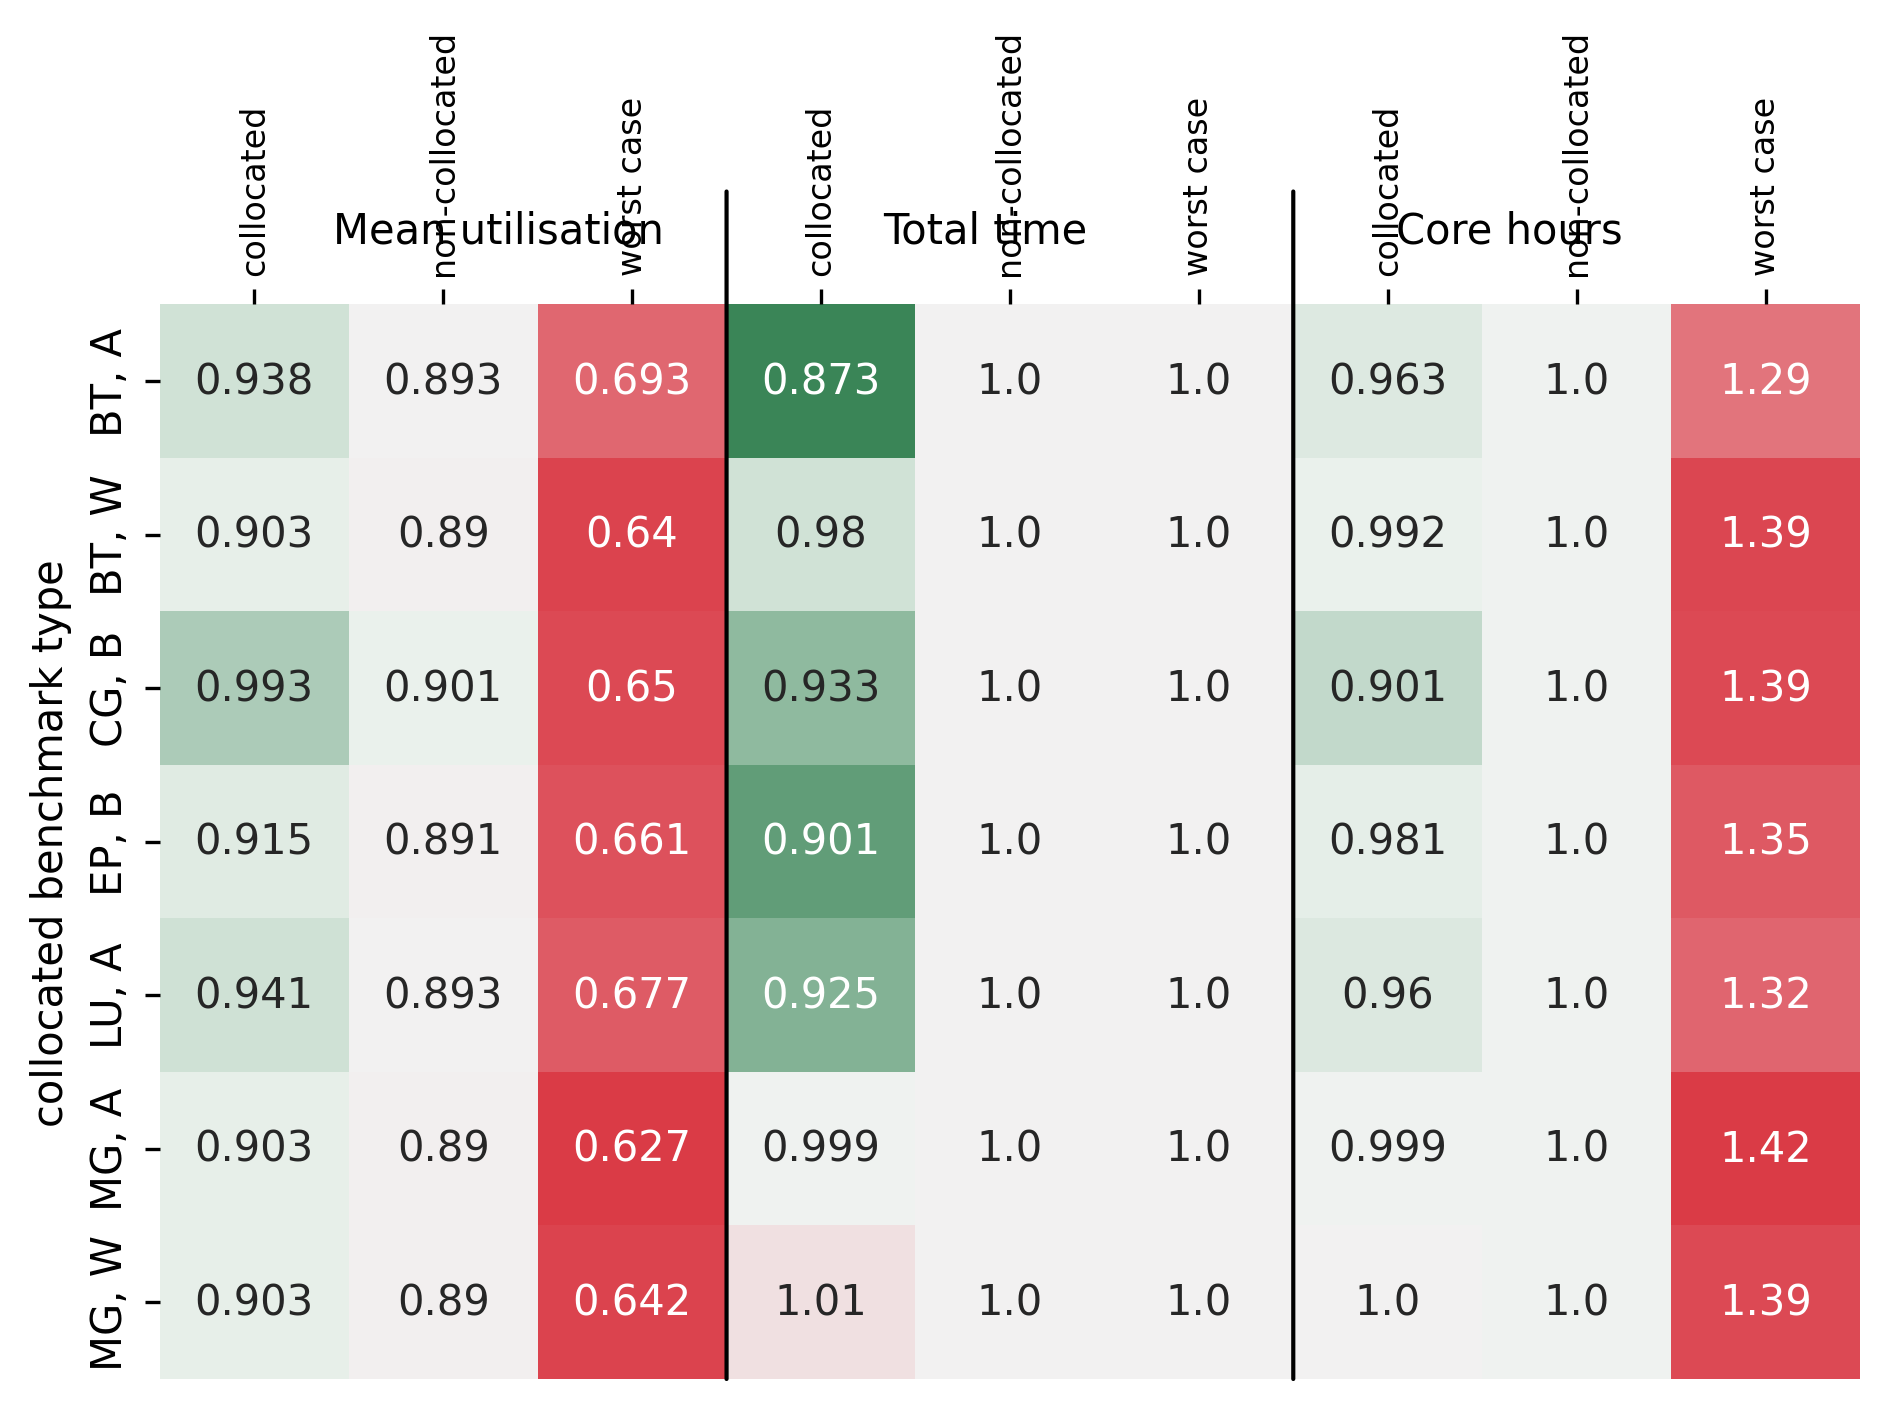

In [9]:


cmap = sns.diverging_palette(140, 10, as_cmap=True)
cmap_r = sns.diverging_palette(10, 140, as_cmap=True)
mask = r.apply(
        lambda x: True if "utilisation" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r, annot=True, fmt=".3", mask=mask, center=0.895, cmap=cmap_r, cbar=False)
mask = r.apply(
        lambda x: True if "time" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r, annot=True, fmt=".3", mask=mask, center=1.0, cmap=cmap, cbar=False)
mask = r.apply(
        lambda x: True if "hours" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r, annot=True, fmt=".3", mask=mask, center=1.0, cmap=cmap, cbar=False)
plot.set_xticklabels(['collocated', 'non-collocated', 'worst case', 'collocated', 'non-collocated', 'worst case','collocated', 'non-collocated', 'worst case'], fontsize=8)
plot.set(xlabel="", ylabel="collocated benchmark type", )
plot.tick_params(axis='x', rotation=90)
plot.xaxis.tick_top()
plot.xaxis.set_label_position('top')
plot.annotate('Mean utilisation',
            xy=(80, 280), xycoords='figure points')
plot.annotate('',
    xy=(3, 7), xycoords='data',
    xytext=(0, 285), textcoords='offset points',
    arrowprops=dict(arrowstyle="-", shrinkA=0, shrinkB=0))
plot.annotate('Total time',
            xy=(212, 280), xycoords='figure points')
plot.annotate('',
    xy=(6, 7), xycoords='data',
    xytext=(0, 285), textcoords='offset points',
    arrowprops=dict(arrowstyle="-", shrinkA=0, shrinkB=0))
plot.annotate('Core hours',
            xy=(335, 280), xycoords='figure points')

plt.tight_layout()
plt.savefig(os.path.join('plots', "colocation_cpu_lulesh_utilization.pdf"), pad_inches = 0, transparent=False)

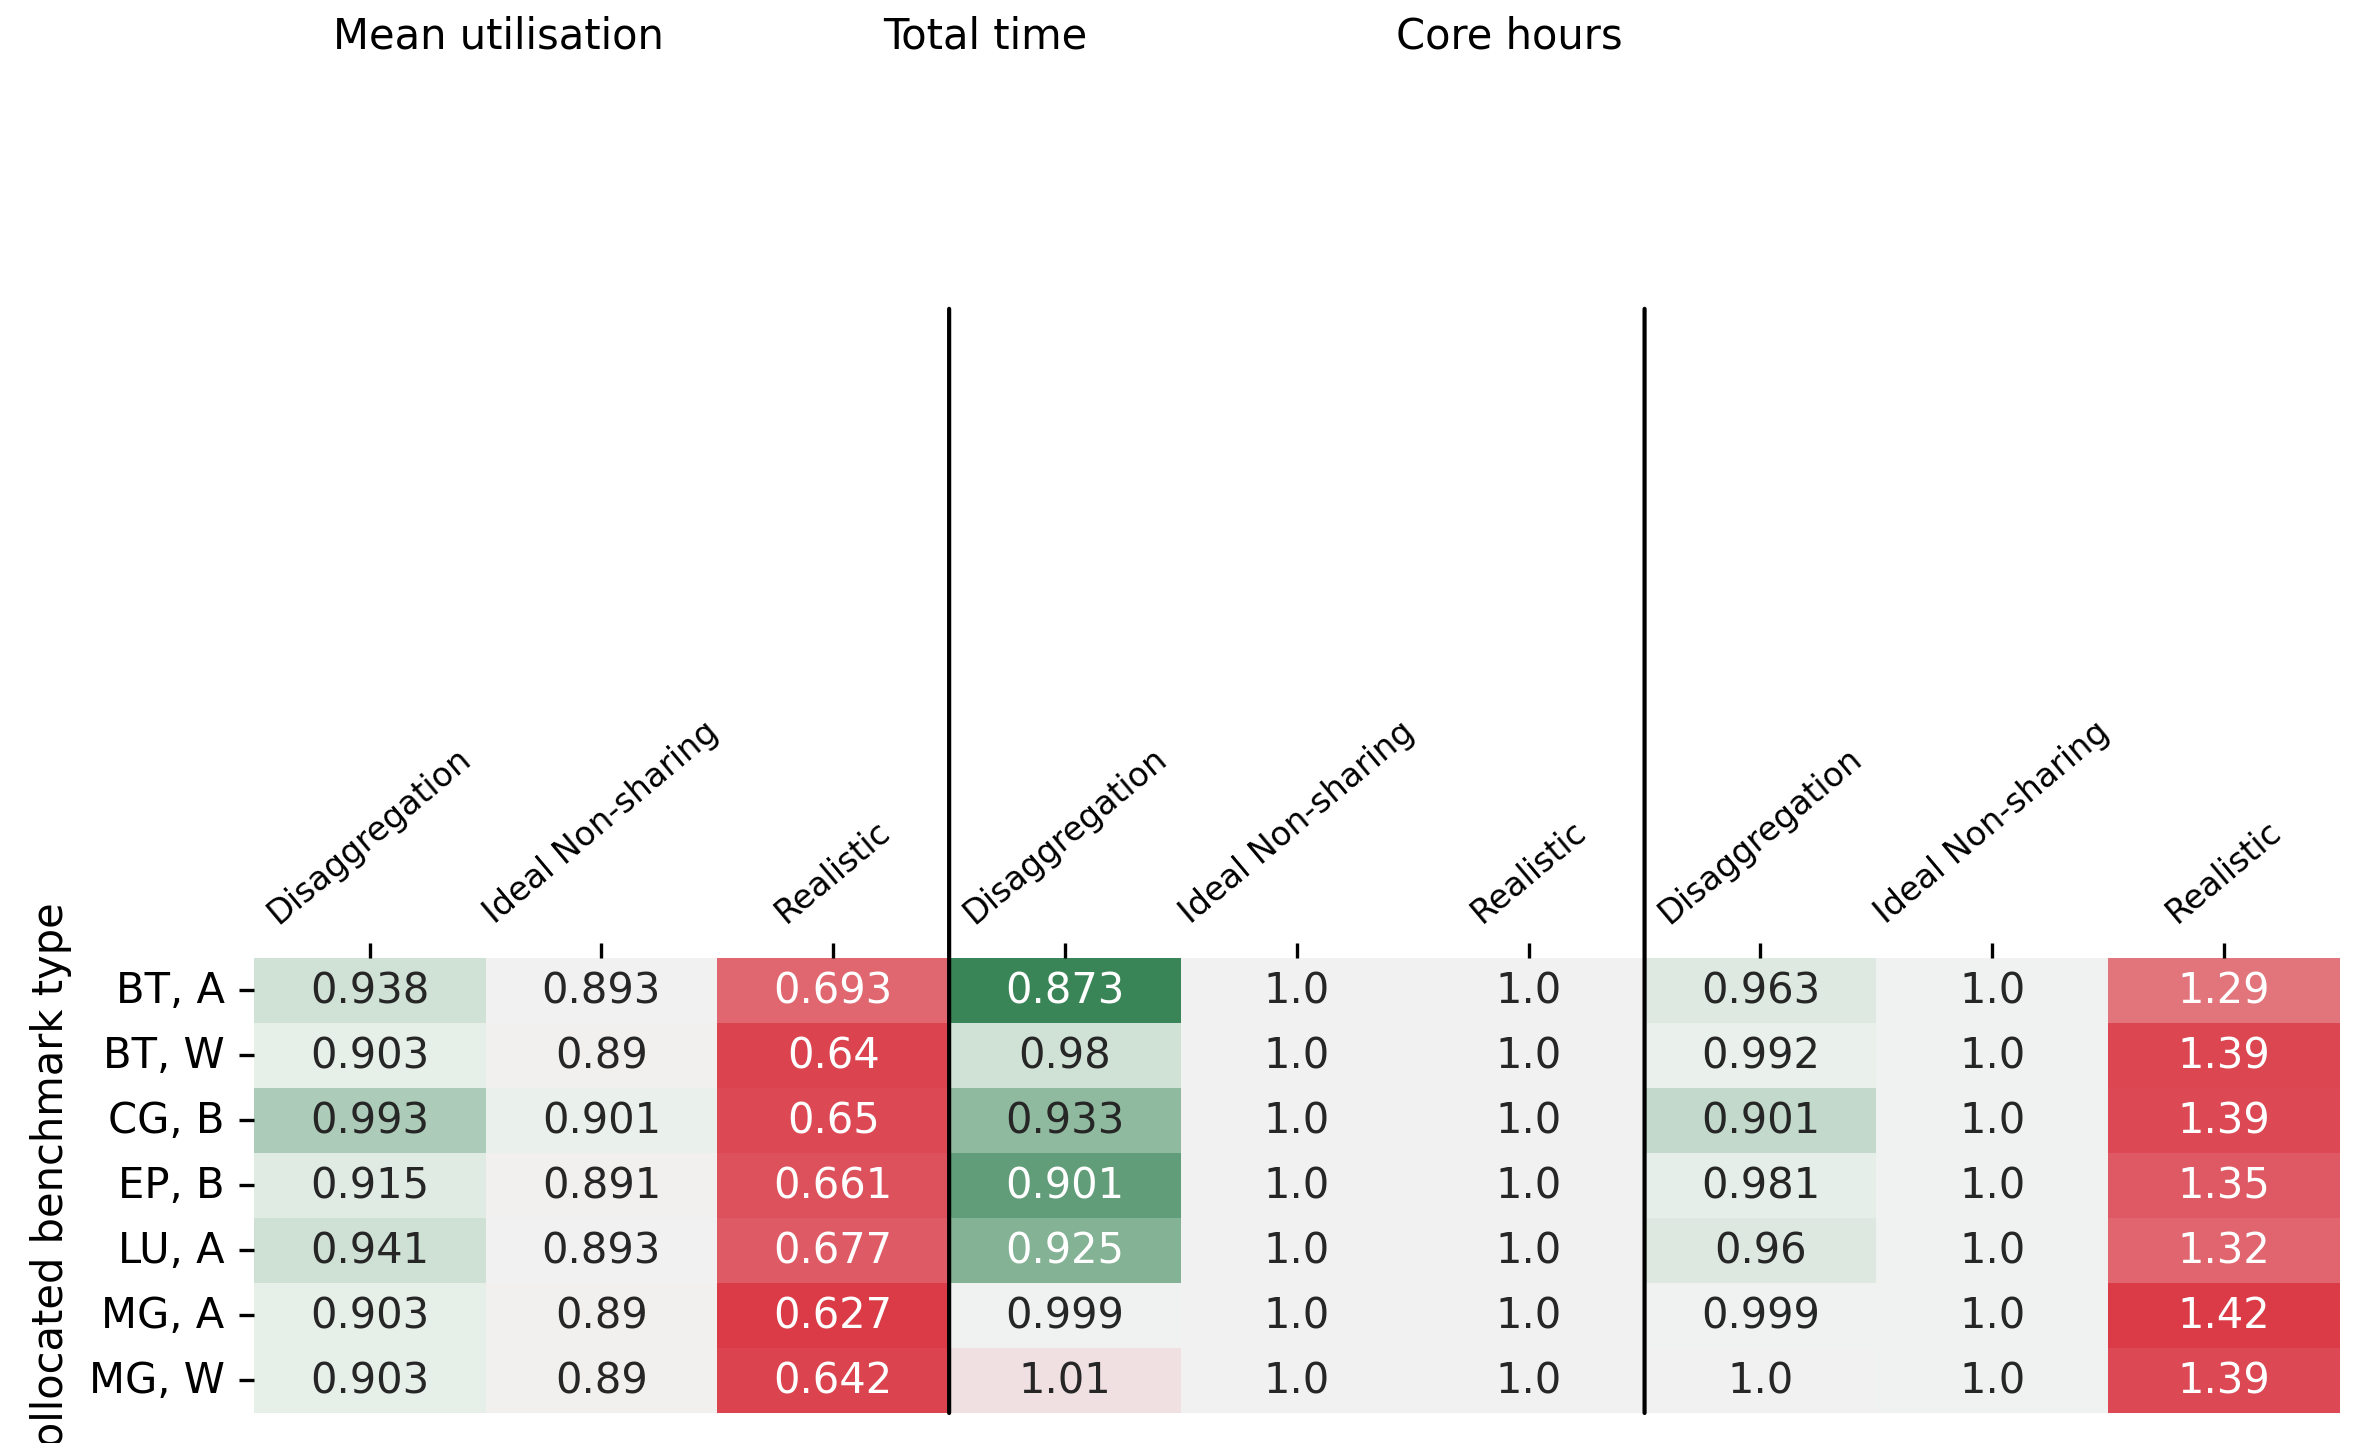

In [13]:
from matplotlib.pyplot import figure

figure(figsize=(8, 3.5), dpi=300)

cmap = sns.diverging_palette(140, 10, as_cmap=True)
cmap_r = sns.diverging_palette(10, 140, as_cmap=True)
mask = r.apply(
        lambda x: True if "utilisation" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r, annot=True, fmt=".3", mask=mask, center=0.895, cmap=cmap_r, cbar=False)
mask = r.apply(
        lambda x: True if "time" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r, annot=True, fmt=".3", mask=mask, center=1.0, cmap=cmap, cbar=False)
mask = r.apply(
        lambda x: True if "hours" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r, annot=True, fmt=".3", mask=mask, center=1.0, cmap=cmap, cbar=False)
plot.set_xticklabels(
    ['Disaggregation', 'Ideal Non-sharing', 'Realistic', 'Disaggregation', 'Ideal Non-sharing', 'Realistic','Disaggregation', 'Ideal Non-sharing', 'Realistic'],
    fontsize=8,
    rotation=20)
plot.set(xlabel="", ylabel="collocated benchmark type", )
plot.tick_params(axis='x', rotation=40)
plot.xaxis.tick_top()
plot.xaxis.set_label_position('top')
plot.annotate('Mean utilisation',
            xy=(80, 335), xycoords='figure points')
plot.annotate('',
    xy=(3, 7), xycoords='data',
    xytext=(0, 265), textcoords='offset points',
    arrowprops=dict(arrowstyle="-", shrinkA=0, shrinkB=0))
plot.annotate('Total time',
            xy=(212, 335), xycoords='figure points')
plot.annotate('',
    xy=(6, 7), xycoords='data',
    xytext=(0, 265), textcoords='offset points',
    arrowprops=dict(arrowstyle="-", shrinkA=0, shrinkB=0))
plot.annotate('Core hours',
            xy=(335, 335), xycoords='figure points')

plt.tight_layout()
plt.savefig(os.path.join('plots', "colocation_cpu_lulesh_utilization2.pdf"), pad_inches = 0, transparent=False)

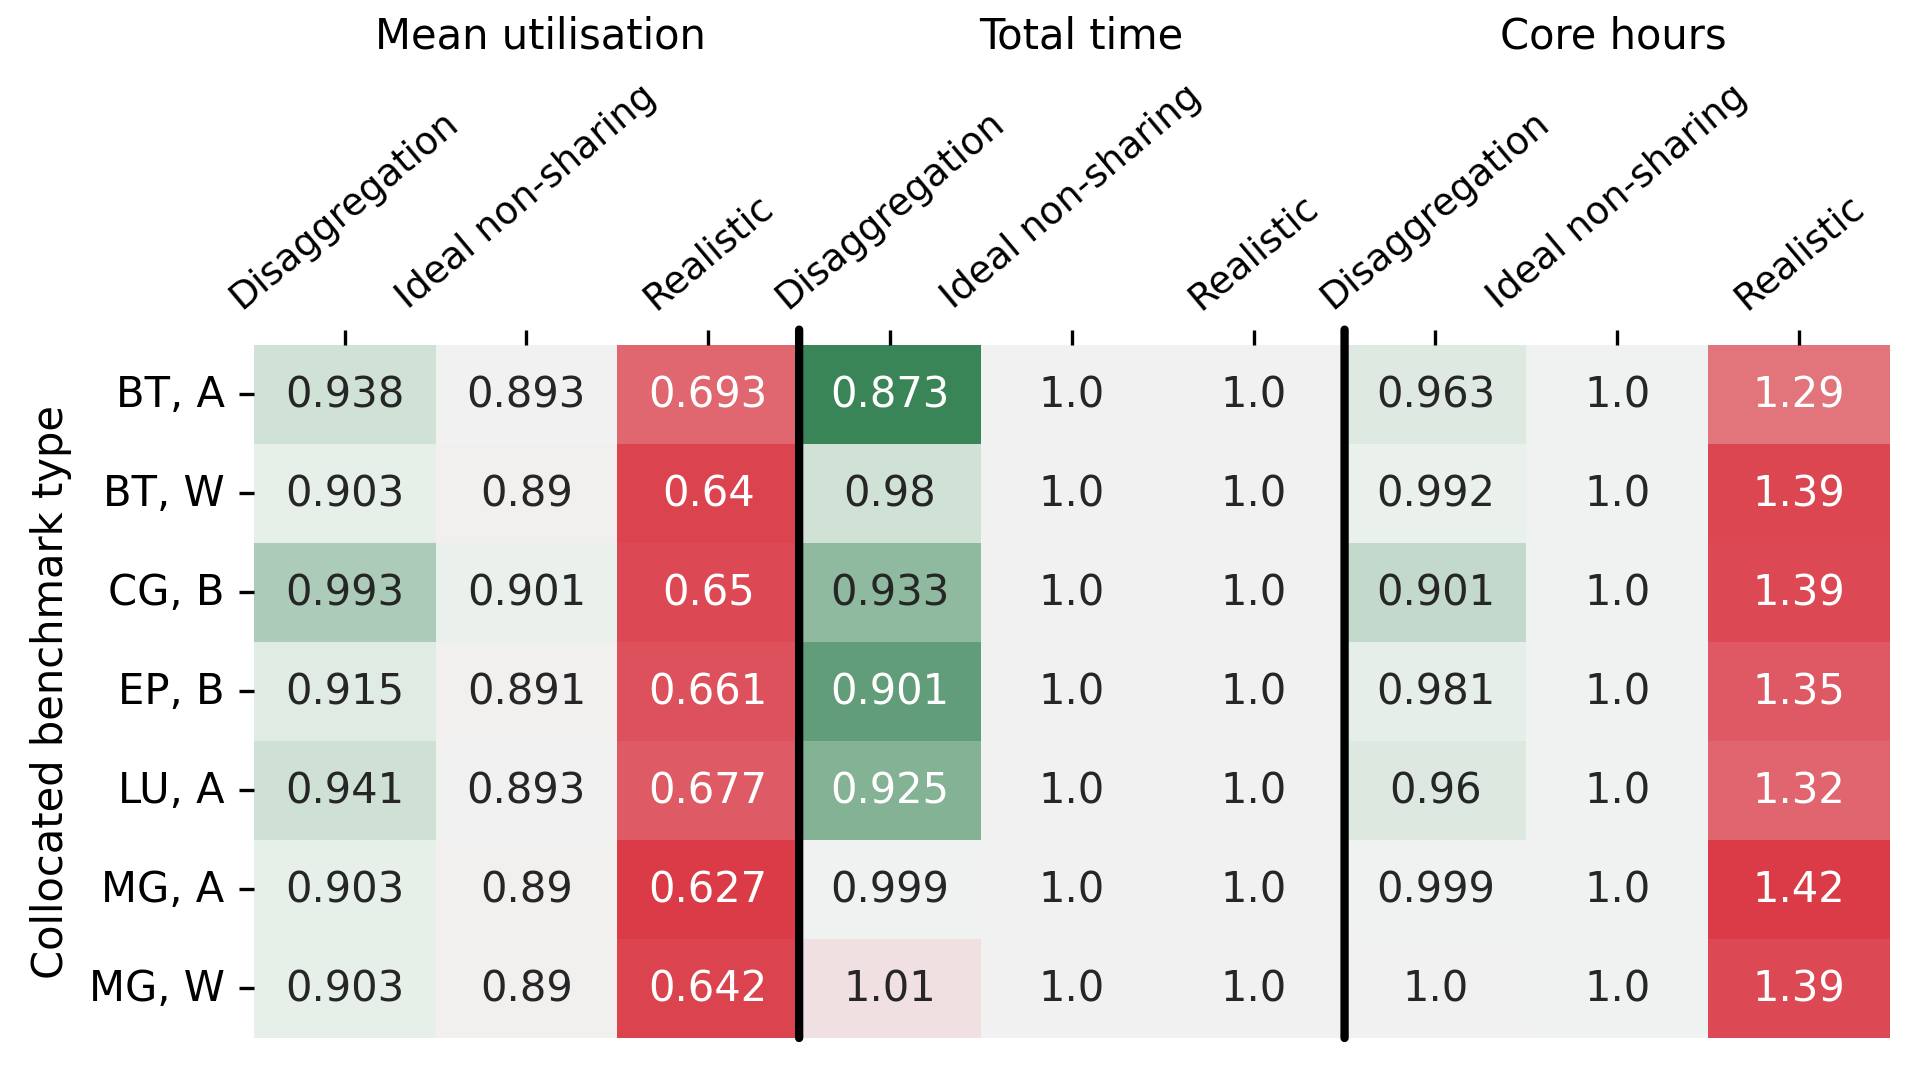

In [61]:
from matplotlib.pyplot import figure

figure(figsize=(6.5, 3.5), dpi=300)

cmap = sns.diverging_palette(140, 10, as_cmap=True)
cmap_r = sns.diverging_palette(10, 140, as_cmap=True)
mask = r.apply(
        lambda x: True if "utilisation" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r, annot=True, fmt=".3", mask=mask, center=0.895, cmap=cmap_r, cbar=False)
mask = r.apply(
        lambda x: True if "time" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r, annot=True, fmt=".3", mask=mask, center=1.0, cmap=cmap, cbar=False)
mask = r.apply(
        lambda x: True if "hours" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r, annot=True, fmt=".3", mask=mask, center=1.0, cmap=cmap, cbar=False)
plot.set_xticklabels(
    ['Disaggregation', 'Ideal non-sharing', 'Realistic', 'Disaggregation', 'Ideal non-sharing', 'Realistic','Disaggregation', 'Ideal non-sharing', 'Realistic'],
    fontsize=9,
    rotation=20,ha='center',)
plot.set(xlabel="", ylabel="Collocated benchmark type", )
plot.tick_params(axis='x', rotation=40)
plot.xaxis.tick_top()
plot.xaxis.set_label_position('top')
plot.annotate('Mean utilisation',
            xy=(90, 245), xycoords='figure points')
plot.annotate('',
    xy=(3, 7), xycoords='data',
    xytext=(0, 170), textcoords='offset points',
    arrowprops=dict(arrowstyle="-", lw=2,shrinkA=0, shrinkB=0))
plot.annotate('Total time',
            xy=(235, 245), xycoords='figure points')
plot.annotate('',
    xy=(6, 7), xycoords='data',
    xytext=(0, 170), textcoords='offset points',
    arrowprops=dict(arrowstyle="-", lw=2,shrinkA=0, shrinkB=0))
plot.annotate('Core hours',
            xy=(360, 245), xycoords='figure points')

plt.tight_layout()
plt.savefig(os.path.join('plots', "colocation_cpu_lulesh_utilization2.pdf"), pad_inches = 0, transparent=False)

# Co-located CPU MILC dataset

In [48]:
def lines_that_start_with(string, fp):
    return [line for line in fp if line.startswith(string)]
def clamp(n, smallest, largest):
    return max(smallest, min(n, largest))

p_map = {
    'bt' : {
        'A': 4,
        'W': 1
    },
    'cg': {
        'B': 8
    },
    'ep': {
        'B': 2
    },
    'lu': {
        'A': 4
    },
    'mg': {
        'A': 1,
        'W': 1
    }
}

data=[]
for dir in glob.glob(os.path.join(BASE_PATH, f'data/colocation_cpu/daint_mc/milc_64/*')):
    
    name = os.path.basename(dir)
    
    app = name.split('_')[2]
    l_size = int(name.split('_')[1])
    bench_size = name.split('_')[3]
    print(l_size)
    if l_size < 96:
        continue
    print(l_size)
    for f in glob.glob(os.path.join(BASE_PATH, f'{dir}/nas_*.out')):
        
        # now open corresponding MILC
        n = os.path.basename(f)
        milc_size = n.split('_')[-2]
        rep = n.split('_')[-1].split('.')[-3]
        milc_path = os.path.join(os.path.dirname(f), f'milc_{milc_size}_{rep}.out')        
        
        with open(milc_path, 'r') as fp:
            milc_time = None
            for line in lines_that_contain("Elapsed", fp):
                milc_time = float(line.split()[-1])
            if milc_time is None:
                print(f"Ignore not existing {milc_path}")
                continue
        
        with open(f, 'r') as fp:
            for line in lines_that_contain("in seconds", fp):
                data.append([l_size, bench_size, app, p_map[app][bench_size], float(line.split()[-1]), milc_time, rep])
                
                
colocated_nas = pd.DataFrame(data=data, columns=['main-size', 'colocated-size', 'colocated-application', 'colocated-ranks', 'colocated-time', 'main-time', 'main-rep'])
colocated_nas['main-application'] = 'milc'
colocated_nas['main-benchmark'] = 'milc'
colocated_nas['main-ranks_per_node'] = 32
colocated_nas['main-ranks'] = 64
colocated_nas['system'] = 'daint-mc'
colocated_nas['type'] = 'colocation'
colocated_nas['colocated-benchmark'] = 'nas'
colocated_nas['nodes'] = 2
colocated_nas['main-benchmark-type'] = colocated_nas.apply(lambda row: f"({row['main-benchmark'].upper()}, {row['main-application'].upper()}, {row['main-size']})", axis=1)
colocated_nas['colocated-benchmark-type'] = colocated_nas.apply(lambda row: f"({row['colocated-benchmark'].upper()}, {row['colocated-application'].upper()}, {row['colocated-size']})", axis=1)
# we always distribute NAS across two nodes if possible
colocated_nas['colocated-ranks_per_node'] = colocated_nas.apply(lambda row: int(clamp(row['colocated-ranks']/2.0, 1.0, 8.0)), axis=1)

colocated_nas

64
96
96
64
96
96
64
96
96
128
128
64
128
128
64
64
128
128
32
96
96
32
32
128
128
96
96
128
128


FileNotFoundError: [Errno 2] No such file or directory: '/work/serverless/2022/software_disaggregation/serverless-software-disaggregation-artifact/data/colocation_cpu/daint_mc/milc_64/nas_128_cg_B/milc_128_3.out'

In [381]:
fields_to_measure = ['colocated-time', 'main-time', 'main-rep']
other_fields = list(colocated_nas.drop(fields_to_measure, axis=1).columns)
colocated_processed = colocated_nas.groupby(other_fields).mean().sort_values(['main-benchmark-type']).reset_index()
colocated_processed

,main-size,colocated-size,colocated-application,colocated-ranks,main-application,main-benchmark,main-ranks_per_node,main-ranks,system,type,colocated-benchmark,nodes,main-benchmark-type,colocated-benchmark-type,colocated-ranks_per_node,colocated-time,main-time
0,128,W,mg,1,milc,milc,32,64,daint-mc,colocation,nas,2,"(MILC, MILC, 128)","(NAS, MG, W)",1,0.206245,361.416634
1,128,B,ep,2,milc,milc,32,64,daint-mc,colocation,nas,2,"(MILC, MILC, 128)","(NAS, EP, B)",1,12.098063,353.819151
2,128,B,cg,8,milc,milc,32,64,daint-mc,colocation,nas,2,"(MILC, MILC, 128)","(NAS, CG, B)",4,10.229391,383.033957
3,128,A,mg,1,milc,milc,32,64,daint-mc,colocation,nas,2,"(MILC, MILC, 128)","(NAS, MG, A)",1,1.706780,372.721452
4,128,A,lu,4,milc,milc,32,64,daint-mc,colocation,nas,2,"(MILC, MILC, 128)","(NAS, LU, A)",2,10.541635,352.050452
5,128,A,bt,4,milc,milc,32,64,daint-mc,colocation,nas,2,"(MILC, MILC, 128)","(NAS, BT, A)",2,22.532339,358.374185
6,128,W,bt,1,milc,milc,32,64,daint-mc,colocation,nas,2,"(MILC, MILC, 128)","(NAS, BT, W)",1,3.540304,365.196033
7,32,A,bt,4,milc,milc,32,64,daint-mc,colocation,nas,2,"(MILC, MILC, 32)","(NAS, BT, A)",2,17.345246,94.042611
8,32,A,lu,4,milc,milc,32,64,daint-mc,colocation,nas,2,"(MILC, MILC, 32)","(NAS, LU, A)",2,8.807397,86.446252
9,32,A,mg,1,milc,milc,32,64,daint-mc,colocation,nas,2,"(MILC, MILC, 32)","(NAS, MG, A)",1,1.248421,87.748733


In [382]:
results = []
for row in colocated_processed.iterrows():
    # Obtain the total time it takes to evaluate the benchmarks
    main_benchmark_type = row[1]['main-benchmark-type']
    main_ranks = row[1]['main-ranks']
    main_synchronous_time = normal_milc_mc_processed[(normal_milc_mc_processed['benchmark-type'] == main_benchmark_type) & (normal_milc_mc_processed['ranks'] == main_ranks)]['time'].iloc[0] / 60
    colocated_benchmark_type = row[1]['colocated-benchmark-type']
    colocated_ranks = row[1]['colocated-ranks']
    colocated_synchronous_time = baseline_processed[(baseline_processed['benchmark-type'] == colocated_benchmark_type) & (baseline_processed['ranks'] == colocated_ranks)]['time'].iloc[0] / 60
    total_synchronous_time = main_synchronous_time + colocated_synchronous_time
    total_colocated_time = row[1]['main-time'] / 60
    total_colocated_time_relative = total_colocated_time / total_synchronous_time
    total_synchronous_time_relative = total_synchronous_time / total_synchronous_time
    
    # Obtain the core hours
    colocated_iterations = np.floor(row[1]['main-time'] / row[1]['colocated-time'])
    total_core_hours_colocated = (daint_CPU * row[1]['nodes'] * total_colocated_time) / 60
    total_core_hours_colocated_run = (main_ranks * total_colocated_time + colocated_iterations * colocated_ranks * row[1]['colocated-time'] / 60) / 60
    total_core_hours_synchronous = (daint_CPU * row[1]['nodes'] * main_synchronous_time + colocated_iterations * colocated_ranks * colocated_synchronous_time) / 60
    total_core_hours_synchronous_run = (main_ranks * main_synchronous_time + colocated_iterations * colocated_ranks * colocated_synchronous_time) / 60
    worst_case_total_core_hours_synchronous = (daint_CPU * row[1]['nodes'] * main_synchronous_time + colocated_iterations * daint_CPU * colocated_synchronous_time) / 60
    worst_case_total_core_hours_synchronous_run = (main_ranks * main_synchronous_time + colocated_iterations * colocated_ranks * colocated_synchronous_time) / 60
    
    # Obtain the relative core hours
    total_core_hours_synchronous_relative = total_core_hours_synchronous / total_core_hours_synchronous
    total_core_hours_colocated_relative = total_core_hours_colocated / total_core_hours_synchronous
    worst_case_total_core_hours_synchronous_relative = worst_case_total_core_hours_synchronous / total_core_hours_synchronous
    
    # Obtain average utilisation over time
    colocated_average_utilisation = total_core_hours_colocated_run / total_core_hours_colocated
    synchronous_average_utilisation = total_core_hours_synchronous_run / total_core_hours_synchronous
    worst_case_synchronous_average_utilisation = worst_case_total_core_hours_synchronous_run / worst_case_total_core_hours_synchronous
    
    #results.append([main_benchmark_type, main_ranks, colocated_benchmark_type, colocated_ranks, colocated_average_utilisation, synchronous_average_utilisation, worst_case_synchronous_average_utilisation, total_synchronous_time, total_colocated_time, total_core_hours_colocated, total_core_hours_synchronous, worst_case_total_core_hours_synchronous])
    colocated_benchmark_type = colocated_benchmark_type[6:-1]
    results.append([main_benchmark_type, main_ranks, colocated_benchmark_type, colocated_ranks, colocated_average_utilisation, synchronous_average_utilisation, worst_case_synchronous_average_utilisation, total_colocated_time_relative,  total_synchronous_time_relative, total_synchronous_time_relative, total_core_hours_colocated_relative, total_core_hours_synchronous_relative, worst_case_total_core_hours_synchronous_relative])
column_names = ['main benchmark type', 'main ranks', 'colocated benchmark type', 'colocated ranks', 'colocated average utilisation', 'synchronous average utilisation', 'worst case synchronous average utilisation', 'total colocated time', 'total synchronous time', 'total worst case synchronous time', 'total core hours colocated', 'total core hours synchronous', 'worst case total core hours synchronous']
results = pd.DataFrame(data=results, columns=column_names).round(3).sort_values(['main benchmark type', 'colocated benchmark type'])
aggregation = {}
for name in column_names[4:]:
    #aggregation[name] = ['min', 'mean', 'max']
    aggregation[name] = ['mean']
r2 = results.groupby(["colocated benchmark type"]).agg(aggregation)
r2

,colocated average utilisation,synchronous average utilisation,worst case synchronous average utilisation,total colocated time,total synchronous time,total worst case synchronous time,total core hours colocated,total core hours synchronous,worst case total core hours synchronous
,mean,mean,mean,mean,mean,mean,mean,mean,mean
colocated benchmark type,,,,,,,,,
"BT, A",0.94225,0.89250,0.71375,0.91300,1.0,1.0,0.94950,1.0,1.25175
"BT, W",0.90275,0.89000,0.68975,0.93250,1.0,1.0,0.93575,1.0,1.29200
"CG, B",0.99900,0.89825,0.69450,0.93825,1.0,1.0,0.89475,1.0,1.29550
"EP, B",0.91525,0.89100,0.67300,0.87275,1.0,1.0,0.90350,1.0,1.32400
"LU, A",0.94225,0.89250,0.70325,0.88550,1.0,1.0,0.89075,1.0,1.26925
"MG, A",0.90300,0.89000,0.67575,0.94050,1.0,1.0,0.93775,1.0,1.31850
"MG, W",0.90300,0.89000,0.68225,0.95125,1.0,1.0,0.94375,1.0,1.30525


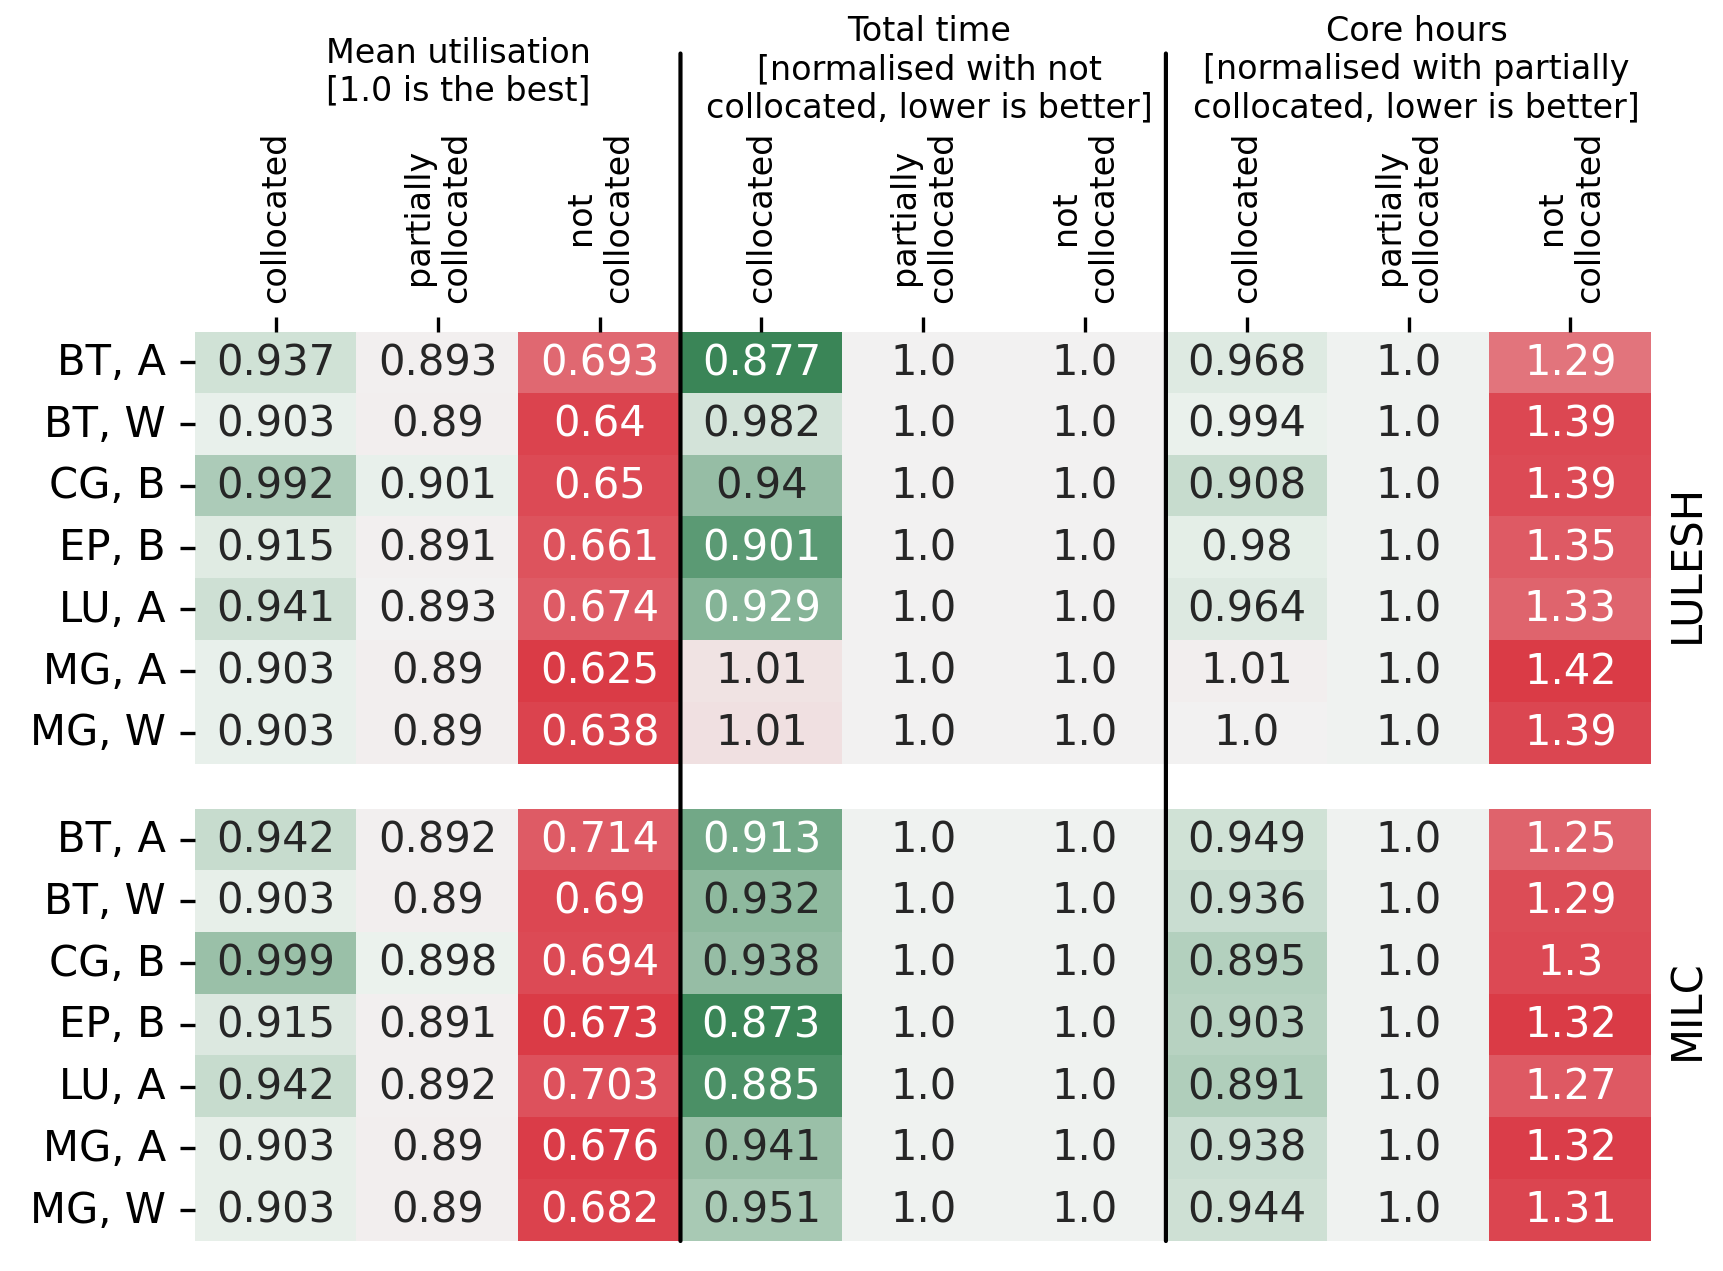

In [416]:
fig, ax = plt.subplots(2, 1)
plt.subplots_adjust(bottom=0)

cmap = sns.diverging_palette(140, 10, as_cmap=True)
cmap_r = sns.diverging_palette(10, 140, as_cmap=True)
mask = r.apply(
        lambda x: True if "utilisation" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r, annot=True, fmt=".3", mask=mask, center=0.895, cmap=cmap_r, cbar=False, ax=ax[0])
mask = r.apply(
        lambda x: True if "time" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r, annot=True, fmt=".3", mask=mask, center=1.0, cmap=cmap, cbar=False, ax=ax[0])
mask = r.apply(
        lambda x: True if "hours" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r, annot=True, fmt=".3", mask=mask, center=1.0, cmap=cmap, cbar=False, ax=ax[0])
plot.set_xticklabels(['collocated', 'partially\ncollocated', 'not\ncollocated', 'collocated', 'partially\ncollocated', 'not\ncollocated', 'collocated', 'partially\ncollocated', 'not\ncollocated'], fontsize=8)
plot.set(xlabel="", ylabel="")
plot.tick_params(axis='x', rotation=90)
plot.xaxis.tick_top()
plot.xaxis.set_label_position('top')
plot.annotate('Mean utilisation\n[1.0 is the best]',
            xy=(110, 281), xycoords='figure points', ha='center', fontsize=8)

plot.annotate('Total time\n[normalised with not\ncollocated, lower is better]',
            xy=(223, 277), xycoords='figure points', ha='center', fontsize=8)

plot.annotate('Core hours\n[normalised with partially\ncollocated, lower is better]',
            xy=(340, 277), xycoords='figure points', ha='center', fontsize=8)

plot.annotate('LULESH',
            xy=(400, 153), xycoords='figure points', rotation=90)

cmap = sns.diverging_palette(140, 10, as_cmap=True)
cmap_r = sns.diverging_palette(10, 140, as_cmap=True)
mask = r2.apply(
        lambda x: True if "utilisation" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r2, annot=True, fmt=".3", mask=mask, center=0.895, cmap=cmap_r, cbar=False, ax=ax[1])
mask = r2.apply(
        lambda x: True if "time" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r2, annot=True, fmt=".3", mask=mask, center=1.0, cmap=cmap, cbar=False, ax=ax[1])
mask = r2.apply(
        lambda x: True if "hours" in x.name[0] else False,
        result_type='broadcast',
        axis=0,
    ).eq(0)
plot = sns.heatmap(r2, annot=True, fmt=".3", mask=mask, center=1.0, cmap=cmap, cbar=False, ax=ax[1])
plot.set(xlabel="", ylabel="")
plot.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plot.annotate('',
    xy=(3, 7), xycoords='data',
    xytext=(0, 285), textcoords='offset points',
    arrowprops=dict(arrowstyle="-", shrinkA=0, shrinkB=0))

plot.annotate('',
    xy=(6, 7), xycoords='data',
    xytext=(0, 285), textcoords='offset points',
    arrowprops=dict(arrowstyle="-", shrinkA=0, shrinkB=0))

plot.annotate('MILC',
            xy=(400, 53), xycoords='figure points', rotation=90)

plt.tight_layout()